<a href="https://colab.research.google.com/github/majid-zamani/CS-SBU-DataMining-Msc-projects/blob/main/MajidMohamadzamani-99422172/Project01/DS_Project01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import urllib 

In [4]:
DataFile = pd.read_csv('./Files/results.csv')
print(DataFile.head())

         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]


In [5]:
DataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42084 non-null  object
 1   home_team   42084 non-null  object
 2   away_team   42084 non-null  object
 3   home_score  42084 non-null  int64 
 4   away_score  42084 non-null  int64 
 5   tournament  42084 non-null  object
 6   city        42084 non-null  object
 7   country     42084 non-null  object
 8   neutral     42084 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [6]:
print('Rows     :',DataFile.shape[0])
print('Columns  :',DataFile.shape[1])
print('\nFeatures :\n     :',DataFile.columns.tolist())
print('\nMissing values    :',DataFile.isnull().values.sum())
print('\nUnique values :  \n',DataFile.nunique())

Rows     : 42084
Columns  : 9

Features :
     : ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']

Missing values    : 0

Unique values :  
 date          15262
home_team       308
away_team       305
home_score       26
away_score       22
tournament      112
city           2038
country         266
neutral           2
dtype: int64


In [8]:
DataFile["Year"]=pd.to_datetime(DataFile['date']).dt.year
DataFile["Month"]=pd.to_datetime(DataFile['date']).dt.month
DataFile['total_score']=DataFile['home_score']+DataFile['away_score']
con=[(DataFile['home_score']==DataFile['away_score']),
     (DataFile['home_score']>DataFile['away_score']),
     (DataFile['home_score']<DataFile['away_score'])]
val=[0,1,2]
val2=['no_win',DataFile['home_team'],DataFile['away_team']]
DataFile['result']=np.select(con,val)
DataFile['who_win']=np.select(con,val2)
DataFile.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland


In [10]:
DataFile.describe().T.round(decimals=1)

,count,mean,std,min,25%,50%,75%,max
home_score,42084.0,1.7,1.8,0.0,1.0,1.0,2.0,31.0
away_score,42084.0,1.2,1.4,0.0,0.0,1.0,2.0,21.0
Year,42084.0,1990.8,24.4,1872.0,1978.0,1998.0,2009.0,2021.0
Month,42084.0,6.8,3.2,1.0,4.0,7.0,10.0,12.0
total_score,42084.0,2.9,2.1,0.0,1.0,3.0,4.0,31.0
result,42084.0,1.1,0.7,0.0,1.0,1.0,2.0,2.0


In [11]:
DataFile.tournament.value_counts().head(10)

Friendly                                17189
FIFA World Cup qualification             7365
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

In [12]:
bestteam=DataFile.groupby('who_win').sum()
bestteam=bestteam[['home_score','away_score','total_score']].sort_values(by=['total_score'],ascending=False)
bestteam=bestteam.drop(['no_win'])
bestteam.head(10)

,home_score,away_score,total_score
who_win,,,
Brazil,1366,836,2202
England,1163,1036,2199
Germany,1233,886,2119
Sweden,1084,806,1890
Argentina,1158,622,1780
Hungary,1030,739,1769
Netherlands,914,598,1512
Mexico,946,485,1431
France,902,524,1426


In [14]:
bestteam2=DataFile.groupby('who_win').count()
bestteam2=bestteam2[['result']].sort_values(by=['result'],ascending=False)
bestteam2=bestteam2.drop(['no_win'])
bestteam2.head(10)

,result
who_win,
Brazil,629
England,580
Germany,560
Argentina,529
Sweden,506
South Korea,455
Mexico,444
Hungary,442
Italy,431


Text(0.5, 0, 'Country')

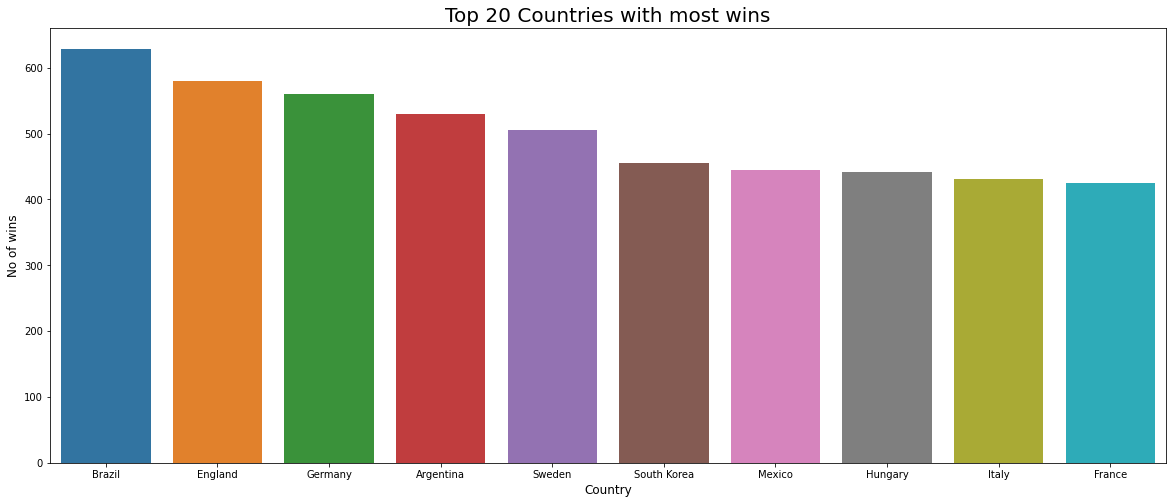

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x='who_win',data=DataFile, order =DataFile['who_win'].value_counts()[1:11].index)
plt.title('Top 20 Countries with most wins', fontsize=20)
plt.ylabel('No of wins', fontsize=12)
plt.xlabel('Country', fontsize=12)

In [17]:
bestteam3=pd.merge(bestteam,bestteam2, how='inner', on='who_win')
bestteam3['teams']=bestteam3.index
bestteam3.head()

,home_score,away_score,total_score,result,teams
who_win,,,,,
Brazil,1366,836,2202,629,Brazil
England,1163,1036,2199,580,England
Germany,1233,886,2119,560,Germany
Sweden,1084,806,1890,506,Sweden
Argentina,1158,622,1780,529,Argentina


In [18]:
match=DataFile.groupby('home_team').count()+DataFile.groupby('away_team').count()
match=match[['city']].sort_values(by=['city'],ascending=False)
match=match.rename(columns = {'city':'play_count'})
match['teams']=match.index
match.head()

,play_count,teams
Sweden,1030.0,Sweden
England,1020.0,England
Brazil,985.0,Brazil
Argentina,984.0,Argentina
Germany,961.0,Germany


In [32]:
bestteam4=pd.merge(match,bestteam3,how='inner', on='teams')
bestteam4['win_per_game']=bestteam4['result']/bestteam4['play_count']*100
bestteam4['goal_per_game']=bestteam4['total_score']/bestteam4['play_count']
bestteam4=bestteam4[['teams',  'play_count', 'total_score', 'result','win_per_game', 'goal_per_game']]
bestteam4.head(10)

,teams,play_count,total_score,result,win_per_game,goal_per_game
0,Sweden,1030.0,1890,506,49.126214,1.834951
1,England,1020.0,2199,580,56.862745,2.155882
2,Brazil,985.0,2202,629,63.857868,2.235533
3,Argentina,984.0,1780,529,53.760163,1.808943
4,Germany,961.0,2119,560,58.272633,2.204995
5,Hungary,943.0,1769,442,46.871686,1.875928
6,Uruguay,889.0,1241,385,43.307087,1.395951
7,Mexico,876.0,1431,444,50.684932,1.633562
8,South Korea,865.0,1394,455,52.601156,1.611561
9,France,851.0,1426,425,49.941246,1.675676


In [33]:
bestteam4=bestteam4.sort_values(by=['win_per_game'],ascending=False)
bestteam4.head(10)

,teams,play_count,total_score,result,win_per_game,goal_per_game
282,Yorkshire,7.0,33,5,71.428571,4.714286
228,Padania,43.0,115,29,67.441860,2.674419
200,Jersey,82.0,186,55,67.073171,2.268293
290,Parishes of Jersey,3.0,14,2,66.666667,4.666667
273,County of Nice,9.0,21,6,66.666667,2.333333
212,Basque Country,57.0,170,37,64.912281,2.982456
2,Brazil,985.0,2202,629,63.857868,2.235533
262,Andalusia,13.0,26,8,61.538462,2.000000
253,Rhodes,18.0,32,11,61.111111,1.777778
289,Crimea,5.0,9,3,60.000000,1.800000


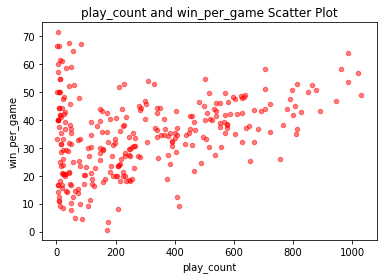

In [34]:
bestteam4.plot(kind='scatter',x='play_count',y='win_per_game',color='r',alpha=0.5)
plt.xlabel('play_count')
plt.ylabel('win_per_game')
plt.title('play_count and win_per_game Scatter Plot')
plt.show()

In [41]:
bestteam5=bestteam4[(bestteam4['win_per_game']>0,4) and (bestteam4['play_count']>300)]
bestteam5.head(10)

,teams,play_count,total_score,result,win_per_game,goal_per_game
2,Brazil,985.0,2202,629,63.857868,2.235533
23,Spain,705.0,1371,411,58.297872,1.944681
4,Germany,961.0,2119,560,58.272633,2.204995
1,England,1020.0,2199,580,56.862745,2.155882
67,Iran,502.0,880,275,54.780876,1.752988
111,Czech Republic,308.0,548,166,53.896104,1.779221
3,Argentina,984.0,1780,529,53.760163,1.808943
12,Italy,812.0,1321,431,53.078818,1.626847
110,Croatia,329.0,540,174,52.887538,1.641337
8,South Korea,865.0,1394,455,52.601156,1.611561


<function matplotlib.pyplot.show>

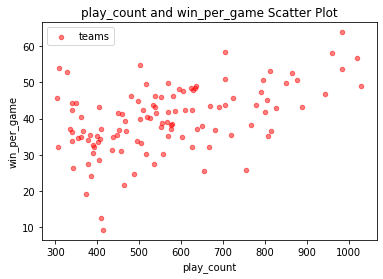

In [42]:
bestteam5.plot(kind='scatter',x='play_count',y='win_per_game',color='r',alpha=0.5,label='teams')
plt.xlabel('play_count')
plt.ylabel('win_per_game')
plt.title('play_count and win_per_game Scatter Plot')
plt.show

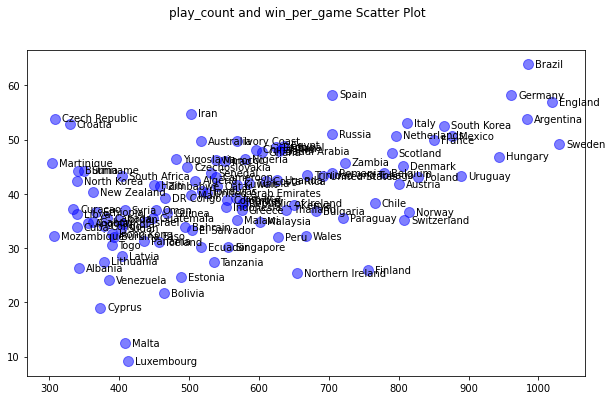

In [45]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('play_count and win_per_game Scatter Plot')
x=bestteam5['play_count']
y=bestteam5['win_per_game']
labels=bestteam5['teams']

ax.scatter(x,y,
           color="blue",  
           s=100,         
           alpha=0.5,     
           linewidths=1)  

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(7, 0),     
                textcoords='offset points', 
                ha='left',         
                va='center')       

plt.show()

In [57]:
teams=DataFile[['Year','who_win']]
teams.head()

,Year,who_win
0,1872,no_win
1,1873,England
2,1874,Scotland
3,1875,no_win
4,1876,Scotland


In [58]:
def re_find(who_win):
    if "no_win" not in who_win.lower():
        return True
    return False
teams2=teams[teams['who_win'].apply(re_find)]
teams2.head()

,Year,who_win
1,1873,England
2,1874,Scotland
4,1876,Scotland
5,1876,Scotland
6,1877,Scotland


In [59]:
list1=[]
list2=[]
list3=[]
b=teams2['Year'].count()
for i in range(0,b):
    list1.append(teams2['Year'].iloc[i])
    list2.append(teams2['who_win'].iloc[i])
    a=str(teams2['Year'].iloc[i])+teams2['who_win'].iloc[i]
    list3.append(a)
list_label = ["Year","who_win","Year_who_win"] 
list_col = [list1,list2,list3]       
zipped = zip(list_label,list_col) 
data_dict = dict(zipped)  
teams3 = pd.DataFrame(data_dict)
teams3.head() 

,Year,who_win,Year_who_win
0,1873,England,1873England
1,1874,Scotland,1874Scotland
2,1876,Scotland,1876Scotland
3,1876,Scotland,1876Scotland
4,1877,Scotland,1877Scotland


In [64]:
teams4=teams3.groupby('Year_who_win').count()
teams4=teams4[['who_win']].sort_values(by=['who_win'], ascending=False)
teams4.head(10)

,who_win
Year_who_win,
1997Brazil,20
1997China PR,17
2008Trinidad and Tobago,17
2001Saudi Arabia,17
1993Mexico,17
2015South Korea,16
1975South Korea,16
2004Japan,16
1999Brazil,16


In [66]:
con=[(DataFile['home_team']==DataFile['who_win']),(DataFile['away_team']==DataFile['who_win'])]
val=['home_win','away_win']
val2=[1,1]
DataFile['home_away_win']=np.select(con,val)
DataFile['home_away_win2']=np.select(con,val2)
DataFile.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,result,who_win,home_away_win,home_away_win2
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,no_win,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,1,England,home_win,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,Scotland,home_win,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,no_win,0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,1,Scotland,home_win,1


In [67]:
d1=DataFile.groupby('home_away_win').count()
d1[['who_win']]

,who_win
home_away_win,
0,9700
away_win,11926
home_win,20458


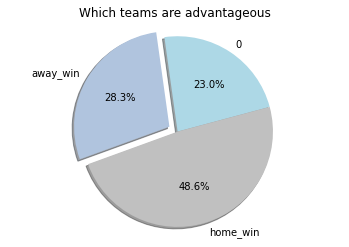

In [68]:
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plt.pie(d1['who_win'], labels=d1.index, 
        autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Which teams are advantageous')
plt.axis('equal')
plt.show()

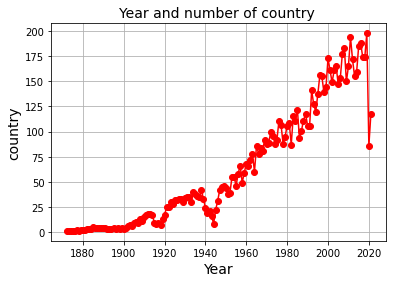

In [70]:
data_c=DataFile[['Year','country']]
data_c = data_c.drop_duplicates()
data_c1=data_c.groupby('Year').count()

plt.plot(data_c1.index, data_c1['country'], color='red', marker='o')
plt.title('Year and number of country ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('country', fontsize=14)
plt.grid(True)
plt.show()

In [72]:
data_c = DataFile.drop(DataFile[DataFile.country == DataFile.home_team].index)
list1=[]
list2=[]
b=len(data_c.index)
for i in range(0,b):
    list1.append(data_c['country'].iloc[i])
    list2.append(1)

list_label = ["Country","Num"] 
list_col = [list1,list2]       
zipped = zip(list_label,list_col) 
data_dict = dict(zipped) 

data_c3 = pd.DataFrame(data_dict) 
data_c4=data_c3.groupby('Country').count()
data_c5=data_c4[['Num']]
data_c6=data_c5.sort_values(by=['Num'], ascending=False)
data_c6.head()

,Num
Country,
United States,772
Malaysia,428
France,375
South Africa,284
United Arab Emirates,276
